### Enron Email classification :
The Enron Email classification problem aims to classify the emails of the Enron Corporation, an American energy company that famously collapsed due to financial scandal and fraud. The dataset consists of approximately 500,000 emails from over 150 Enron employees, including senior executives.

The objective of the problem is to develop a machine learning algorithm that can accurately classify the emails into different categories based on their content.

The Enron Email classification problem is a challenging task due to the high dimensionality of the data and the complex relationships between the emails and their categories. However, it is also a crucial problem with many practical applications and can benefit from advances in natural language processing and machine learning techniques.

Before going to the machine learning model building, we will need to clearning and preprocessing the given. In this notebook, I will be preprocessing and cleaning the given data.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


### load the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import email
import warnings 
warnings.filterwarnings('ignore')
import parser

In [3]:
# read the dataset
df= pd.read_csv("/Users/radhikasharma/Documents/Radhika/MSCA/Quarter 3/Capstone1/emails.csv")

## EDA

In [4]:
# display first 5 rows of the dataset using head function
df.head()

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...


In [5]:
# check the shape 
df.shape

(517401, 2)

In [6]:
# get message value
print(df.loc[1]['file'])
print("\n")
print(df.loc[1]['message'])

allen-p/_sent_mail/10.


Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and wh

In [8]:
# transform the email into correct form
message = df.loc[1]['message']
emails = email.message_from_string(message)
emails.items()

[('Message-ID', '<15464986.1075855378456.JavaMail.evans@thyme>'),
 ('Date', 'Fri, 4 May 2001 13:51:00 -0700 (PDT)'),
 ('From', 'phillip.allen@enron.com'),
 ('To', 'john.lavorato@enron.com'),
 ('Subject', 'Re:'),
 ('Mime-Version', '1.0'),
 ('Content-Type', 'text/plain; charset=us-ascii'),
 ('Content-Transfer-Encoding', '7bit'),
 ('X-From', 'Phillip K Allen'),
 ('X-To', 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>'),
 ('X-cc', ''),
 ('X-bcc', ''),
 ('X-Folder', "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail"),
 ('X-Origin', 'Allen-P'),
 ('X-FileName', 'pallen (Non-Privileged).pst')]

In [9]:
# get email body
emails.get_payload()

"Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the presenter speaks and the others are quiet just waiting for their turn.   The meetings might be better if held in a round table discussion format.  \n\nMy suggestion for where to go is Austin.  Play golf and rent a ski boat and jet ski's.  Flying somewhere takes too much time.\n"

In [10]:
emails.get("Date")

'Fri, 4 May 2001 13:51:00 -0700 (PDT)'

In [11]:
# feature we are extract from the email 
# 1. date 2. X-From 3. X-To 4. Subject 5. X-Folder 
# extract feature from the email for all datasets
def extract_data(feature,df):
    column= []
    for row in df:
        e = email.message_from_string(row)
        column.append(e.get(feature))
    return column    

In [12]:
df['Date'] = extract_data("Date",df['message'])
df['Subject'] = extract_data("Subject",df['message'])
df['X-From'] = extract_data("X-From",df['message'])
df['X-To'] = extract_data("X-To",df['message'])
df['X-Folder'] = extract_data("X-Folder",df['message'])

In [13]:
# extract email body from email message
def get_email_body(data):
    column =[]
    for msg in data:
        e = email.message_from_string(msg)
        column.append(e.get_payload())
    return column
df['body'] = get_email_body(df['message'])

In [14]:
df.head()

,file,message,Date,Subject,X-From,X-To,X-Folder,body
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",,Phillip K Allen,Randall L Gay,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",Re: Hello,Phillip K Allen,Greg Piper,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Let's shoot for Tuesday at 11:45.


In [15]:
# Employee names

def emp_name(data):
    column=[]
    for msg in data:
        column.append(msg.split("/")[0])
    return column

df['Employee'] = emp_name(df['file'])

In [16]:
df.head(3)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!,allen-p


In [20]:
df['Date']

0         14-05-2001 16:39:00
1         04-05-2001 13:51:00
2         18-10-2000 03:00:00
3         23-10-2000 06:13:00
4         31-08-2000 05:07:00
                 ...         
517396    28-11-2001 13:30:11
517397    28-11-2001 12:47:48
517398    28-11-2001 07:20:00
517399    27-11-2001 11:52:45
517400    26-11-2001 10:48:43
Name: Date, Length: 517401, dtype: object

In [21]:
# find the unique folder
print("number of folder :",df.shape[0])
print("number of unique folder :",df['X-Folder'].unique().shape[0])

number of folder : 517401
number of unique folder : 5336


In [22]:
unique_emails = pd.DataFrame(df['X-Folder'].value_counts())
unique_emails.reset_index(inplace=True)

# show top 20 folder highest counts
unique_emails.columns =['Folder_name','Count']
unique_emails.iloc[:20,:]

,Folder_name,Count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6639
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5934
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5637
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5211
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,5066
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4956
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4660
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,4022


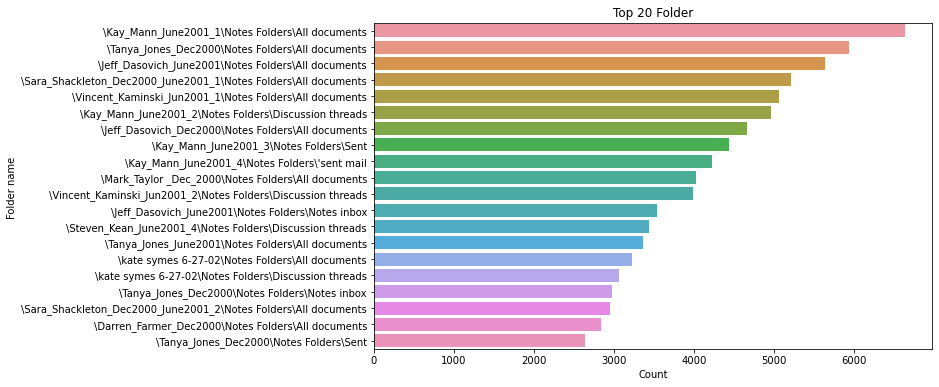

In [23]:
# visualize top 20 folder name
plt.figure(figsize=(10,6))
sns.barplot(x='Count',y='Folder_name',data=unique_emails.iloc[:20,:])
plt.title("Top 20 Folder")
plt.xlabel('Count')
plt.ylabel("Folder name ")
plt.show()

In [24]:
# top email sender employees
emp_data = pd.DataFrame(df['Employee'].value_counts())
emp_data.reset_index(inplace=True)

emp_data.columns =['Employee Name','Count']
emp_data.iloc[:20,:]

,Employee Name,Count
0,kaminski-v,28465
1,dasovich-j,28234
2,kean-s,25351
3,mann-k,23381
4,jones-t,19950
5,shackleton-s,18687
6,taylor-m,13875
7,farmer-d,13032
8,germany-c,12436
9,beck-s,11830


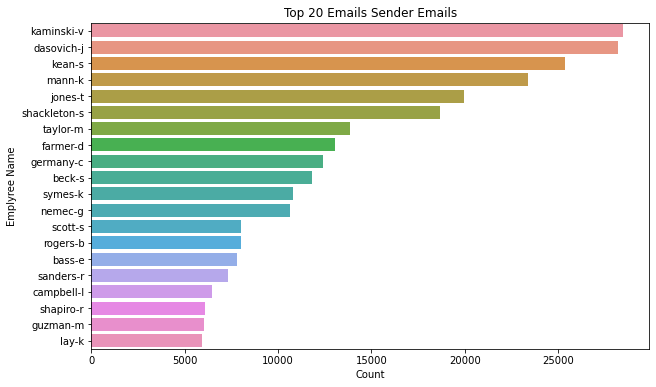

In [25]:
# visualize top 20 emails sender employee
plt.figure(figsize=(10,6))
sns.barplot(x='Count',y='Employee Name',data=emp_data.iloc[:20,:])
plt.title("Top 20 Emails Sender Emails")
plt.xlabel("Count")

plt.ylabel("Emplyree Name")
plt.show()

In [26]:
df.head(3)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,04-05-2001 13:51:00,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000 03:00:00,Re: test,Phillip K Allen,Leah Van Arsdall,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!,allen-p


### data cleaning and transformation

In [27]:
#Date columns
from datetime import datetime 
from dateutil import parser

# this is sample example
x = parser.parse("Fri, 4 May 2001 13:51:00 -0700 (PDT)")
print(x.strftime("%d-%m-%Y %H:%M:%S"))

04-05-2001 13:51:00


In [28]:
def change_date_type(data):
    column=[]
    for date in data:
        column.append(parser.parse(date).strftime("%d-%m-%Y %H:%M:%S"))
    return column

df['Date'] = change_date_type(df['Date'])

In [29]:
# column  X-Folder
x_value =df.loc[1,"X-Folder"]
# extract last folder name
folder_name =x_value.split("\\")[-1]
folder_name

"'Sent Mail"

In [30]:
def process_folder_name(folders):
    column=[]
    for folder in folders:
        if folder is None or folder=="":
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder']= process_folder_name(df['X-Folder'])            

In [31]:
df.head(3)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,'sent mail,Here is our forecast\n\n,allen-p
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,05-04-2001 13:51:00,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,'sent mail,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000 03:00:00,Re: test,Phillip K Allen,Leah Van Arsdall,'sent mail,test successful. way to go!!!,allen-p


In [32]:
# found unique folder
print("Lenghts of unique folder : ",len(df['X-Folder'].unique()))
# fetch some folder name 
df['X-Folder'].unique()[:20]

Lenghts of unique folder :  1782


array(["'sent mail", 'all documents', 'contacts', 'deleted items',
       'discussion threads', 'inbox', 'notes inbox', 'sent items', 'sent',
       'straw', '2000 conference', 'active international', 'avaya', 'bmc',
       'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

In [33]:
# see subject empty string 
df[df['Subject']==""]

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,14-05-2001 16:39:00,,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,'sent mail,Here is our forecast\n\n,allen-p
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,23-10-2000 06:13:00,,Phillip K Allen,Randall L Gay,'sent mail,"Randy,\n\n Can you send me a schedule of the s...",allen-p
6,allen-p/_sent_mail/1003.,Message-ID: <16254169.1075863688286.JavaMail.e...,22-08-2000 07:44:00,,Phillip K Allen,"david.l.johnson@enron.com, John Shafer",'sent mail,Please cc the following distribution list with...,allen-p
11,allen-p/_sent_mail/104.,Message-ID: <25459584.1075855687536.JavaMail.e...,13-10-2000 06:45:00,,Phillip K Allen,stagecoachmama@hotmail.com,'sent mail,"Lucy,\n\n Here are the rentrolls:\n\n\n\n Open...",allen-p
14,allen-p/_sent_mail/107.,Message-ID: <2465689.1075855687605.JavaMail.ev...,10-05-2000 06:26:00,,Phillip K Allen,David W Delainey,'sent mail,"Dave, \n\n Here are the names of the west desk...",allen-p
...,...,...,...,...,...,...,...,...,...
516846,zufferli-j/calendar/1.,Message-ID: <28390332.1075842024763.JavaMail.e...,02-05-2002 09:43:01,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",,calendar,Conference call with UBS,zufferli-j
516853,zufferli-j/deleted_items/1.,Message-ID: <29945908.1075842020454.JavaMail.e...,02-06-2002 11:38:22,,"Hayden, Frank </O=ENRON/OU=NA/CN=RECIPIENTS/CN...","Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",deleted items,Sorry I missed call. My understanding is that...,zufferli-j
517247,zufferli-j/sent_items/269.,Message-ID: <24283319.1075842034234.JavaMail.e...,08-02-2001 10:02:58,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",'majordomo@majordomo.pjm',sent items,unsubscribe pjm-customer-info,zufferli-j
517289,zufferli-j/sent_items/308.,Message-ID: <3432160.1075842035153.JavaMail.ev...,07-03-2001 12:31:56,,"Zufferli, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...","Lavorato, John </O=ENRON/OU=NA/CN=RECIPIENTS/C...",sent items,home number is (403) 685-4817,zufferli-j


In [34]:
# replace empty missing value in subject with np.nan
def replace_empty_with_nan(subject):
    column=[]
    for sub in subject:
        if sub=="":
            column.append(np.nan)
        else:
            column.append(sub)
    return column

df['Subject'] = replace_empty_with_nan(df['Subject'])
df['X-To'] =  replace_empty_with_nan(df['X-To'])

In [35]:
# check missing value in the dataset
df.isnull().sum()

file            0
message         0
Date            0
Subject     19187
X-From         29
X-To         9153
X-Folder       29
body            0
Employee        0
dtype: int64

In [36]:
# calculate the missing value percentage
missing_value= df.isnull().sum()
miss =missing_value[missing_value>0]
miss_percen = miss/df.shape[0]

miss_percen

Subject     0.037083
X-From      0.000056
X-To        0.017690
X-Folder    0.000056
dtype: float64

In [37]:
# drop missing value rows from the dataset
df.dropna(axis=0,inplace=True)

In [38]:
df.isnull().sum()

file        0
message     0
Date        0
Subject     0
X-From      0
X-To        0
X-Folder    0
body        0
Employee    0
dtype: int64

In [39]:
df.head(3)

,file,message,Date,Subject,X-From,X-To,X-Folder,body,Employee
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,05-04-2001 13:51:00,Re:,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,'sent mail,Traveling to have a business meeting takes the...,allen-p
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,18-10-2000 03:00:00,Re: test,Phillip K Allen,Leah Van Arsdall,'sent mail,test successful. way to go!!!,allen-p
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,31-08-2000 05:07:00,Re: Hello,Phillip K Allen,Greg Piper,'sent mail,Let's shoot for Tuesday at 11:45.,allen-p


In [40]:
# now need to drop some columns which is not necessary for the model 
drop_column_names= ['file','message','Date','X-From','X-To','Employee']
df.drop(columns=drop_column_names,axis=1,inplace=True)

In [41]:
df.columns

Index(['Subject', 'X-Folder', 'body'], dtype='object')

In [42]:
df.head()

,Subject,X-Folder,body
1,Re:,'sent mail,Traveling to have a business meeting takes the...
2,Re: test,'sent mail,test successful. way to go!!!
4,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.
5,Re: Hello,'sent mail,"Greg,\n\n How about either next Tuesday or Thu..."
7,Re: PRC review - phone calls,'sent mail,any morning between 10 and 11:30


In [43]:
df.to_csv("cleaned_dataset.csv",index=False)